<a href="https://colab.research.google.com/github/Swapn2/Data-Science-Learnings/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [68]:
x = 6*np.random.rand(200,1) -3
y = .8*x**2 + .9*x + 2 + np.random.randn(200,1)

In [69]:
x

array([[-9.82028279e-01],
       [-2.89815272e+00],
       [-1.55751889e+00],
       [ 1.03921427e+00],
       [ 2.05896875e+00],
       [-2.94690235e+00],
       [-9.62247742e-01],
       [-1.17488608e+00],
       [-3.71329755e-02],
       [ 9.59172559e-01],
       [ 3.58888067e-01],
       [ 1.87190587e+00],
       [ 1.33351959e+00],
       [-2.50614535e+00],
       [ 2.98901772e+00],
       [-7.81708267e-01],
       [-2.74199512e+00],
       [ 2.73502413e+00],
       [-6.93890102e-01],
       [ 1.66996144e+00],
       [-1.37672144e+00],
       [-2.68231111e+00],
       [ 2.55930909e+00],
       [-1.15094401e+00],
       [ 2.47522558e+00],
       [-1.84970078e+00],
       [ 6.00304729e-01],
       [-8.40046453e-01],
       [ 2.81139237e+00],
       [ 1.43206780e+00],
       [ 1.30012266e+00],
       [ 2.29372117e+00],
       [-2.54214653e+00],
       [-1.36055376e+00],
       [-1.33557822e+00],
       [-7.01582395e-01],
       [-7.95576817e-01],
       [ 2.56491474e+00],
       [ 1.2

In [70]:
y

array([[ 1.54180144],
       [ 7.02093492],
       [ 0.88039432],
       [ 3.46354039],
       [ 8.10552258],
       [ 4.42199491],
       [ 2.50703032],
       [ 0.93292576],
       [ 2.03313019],
       [ 3.79805789],
       [ 3.7489106 ],
       [ 6.17412918],
       [ 4.71725511],
       [ 4.23866585],
       [10.7418196 ],
       [ 3.63379899],
       [ 6.32781352],
       [12.33078078],
       [ 2.91991282],
       [ 6.64170355],
       [ 2.51043088],
       [ 4.44146925],
       [ 9.97591369],
       [ 2.07948836],
       [ 8.48153795],
       [ 2.63854102],
       [ 5.2197391 ],
       [ 0.93019223],
       [11.78296446],
       [ 6.49871051],
       [ 3.48316875],
       [ 9.217719  ],
       [ 4.29184808],
       [ 3.2990579 ],
       [ 1.61840042],
       [ 1.68434944],
       [ 1.9289796 ],
       [10.12034437],
       [ 3.92570174],
       [ 2.32339409],
       [ 2.06092331],
       [ 2.58576961],
       [12.3625643 ],
       [ 7.20037586],
       [ 6.26277819],
       [ 4

In [71]:
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


Text(0, 0.5, 'Y')

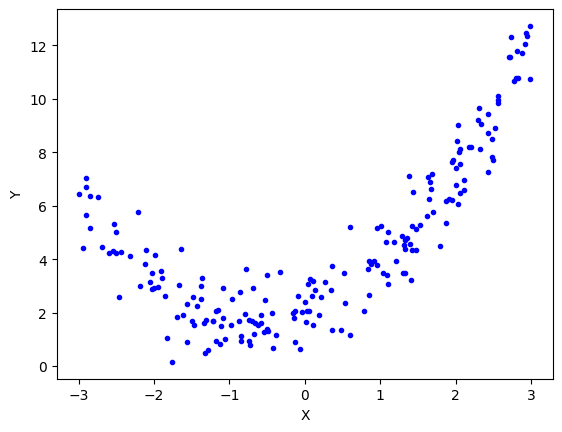

In [72]:
# plt.scatter(x,y)
plt.plot(x,y,'b.')
plt.xlabel("X")
plt.ylabel("Y")

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state = 42)

In [74]:
x_train.shape

(160, 1)

In [75]:
y_train.shape

(160, 1)

In [76]:
lr = LinearRegression()

In [77]:
lr.fit(x_train,y_train)

LinearRegression()

In [78]:
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.3140097139269218

Text(0, 0.5, 'y')

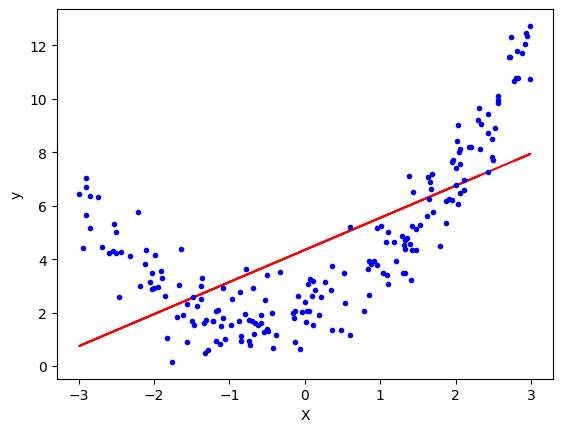

In [79]:
plt.plot(x_train,lr.predict(x_train),color = 'red')
plt.plot(x,y,'b.')
plt.xlabel("X")
plt.ylabel("y")

In [80]:
poly = PolynomialFeatures(degree = 2, include_bias= True)

x_train_feature = poly.fit_transform(x_train)
x_test_feature = poly.transform(x_test)

In [81]:
x_train[0]

array([2.31446436])

In [82]:
x_train_feature[0]

array([1.        , 2.31446436, 5.35674527])

In [83]:
x_test[0]

array([-0.42963953])

In [84]:
x_test_feature[0]

array([ 1.        , -0.42963953,  0.18459012])

In [86]:
lr.fit(x_train_feature,y_train)
y_pred = lr.predict(x_test_feature)

In [87]:
print(lr.coef_)

[[0.         1.02129008 0.77910471]]


In [88]:
print(lr.intercept_)

[2.05303205]


In [89]:
r2_score(y_test,y_pred)

0.9082022366517337

In [93]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

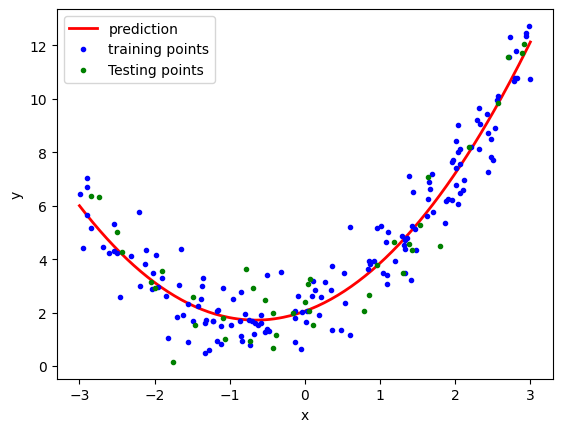

In [94]:
plt.plot(x_new,y_new,"r-",linewidth = 2, label = "prediction")
plt.plot(x_train,y_train,"b.",label = "training points")
plt.plot(x_test, y_test, "g.",label = "Testing points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()